In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Transformed_Housing_Data2.csv')

In [4]:
df.info()
sm=pd.DataFrame({'Sales':df['Sale_Price'].head(30),'Flat':df['Flat Area (in Sqft)'].head(30)})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

sales=scale.fit_transform(sm['Sales'].values.reshape(-1,1))
flat=scale.fit_transform(sm['Flat'].values.reshape(-1,1))

In [31]:
sales,flat

(array([[-0.96330168],
        [ 0.28411947],
        [-1.12865108],
        [ 0.54457438],
        [ 0.17362345],
        [ 2.61864388],
        [-0.82281388],
        [-0.68725894],
        [-0.9333099 ],
        [-0.56433212],
        [ 0.77543213],
        [ 0.00787942],
        [-0.61563384],
        [-0.26046806],
        [ 0.25254918],
        [ 0.72610355],
        [-0.28019949],
        [ 0.07496629],
        [-1.0931345 ],
        [-0.93133676],
        [-0.31966236],
        [ 2.61864388],
        [-0.714291  ],
        [-0.84175605],
        [-0.5406544 ],
        [-0.9194979 ],
        [ 1.85868776],
        [ 0.79319042],
        [-0.11050917],
        [ 0.99839732]]),
 array([[-0.83804685],
        [ 0.68434712],
        [-1.28709831],
        [ 0.01624617],
        [-0.29042312],
        [ 3.80580238],
        [-0.25208946],
        [-0.96947654],
        [-0.18089837],
        [-0.06042115],
        [ 1.7686421 ],
        [-0.8599518 ],
        [-0.56423498],
        [

In [39]:
def mc_init(sales):
    return .1,sales.mean()

def generate_predictions(m,c,flat):
    predictions=[]
    for i in flat:
        predictions.append(m*i+c)
    return predictions
def find_cost(predictions,sales):
    sum=0
    for i in range(len(sales)):
        sum+=(predictions[i]-sales[i])**2
    return sum/len(sales)
def generate_gradients(predictions,sales,flat):
    n=len(sales)
    gm=2/n*(np.sum((predictions-sales)*flat))
    gc=2/n*(np.sum(predictions-sales))
    return gm,gc
def param_update(gm,gc,m,c):
    global alpha
    m=m-alpha*gm
    c=c-alpha*gc
    return m,c
def result(m,c,sales,flat,predictions,cost,i):
    print('FINAL RESULT:')
    print('i:',i,'m:',m,'c:',c,'cost:',cost)
    plt.scatter(flat,sales,color='red')
    plt.plot(flat,predictions)


i: 0 m: 0.11316346413633305 c: 1.1849780416165836e-16 Cost: [0.85836536]
i: 20 m: 0.3275595607435688 c: 1.240489192847842e-16 Cost: [0.61824722]
i: 40 m: 0.4706921039517346 c: 1.3248661427193537e-16 Cost: [0.51122648]
i: 60 m: 0.5662485308150865 c: 1.415904430738617e-16 Cost: [0.46352728]
i: 80 m: 0.6300427631414932 c: 1.4951003398285442e-16 Cost: [0.44226774]
i: 100 m: 0.6726323011945988 c: 1.611303683072644e-16 Cost: [0.43279235]
i: 120 m: 0.7010654163122192 c: 1.666074685620818e-16 Cost: [0.42856916]
i: 140 m: 0.7200475906265729 c: 1.6660746856208182e-16 Cost: [0.42668689]
i: 160 m: 0.7327202415200801 c: 1.669405354694694e-16 Cost: [0.42584795]
i: 180 m: 0.7411806042798547 c: 1.6694053546946945e-16 Cost: [0.42547404]
i: 200 m: 0.7468288099022201 c: 1.6760666928424454e-16 Cost: [0.42530739]
i: 220 m: 0.7505995970018231 c: 1.6605235704976932e-16 Cost: [0.42523311]
i: 240 m: 0.7531170045293095 c: 1.6642243139131105e-16 Cost: [0.42520001]
i: 260 m: 0.7547976458628156 c: 1.67162580074394

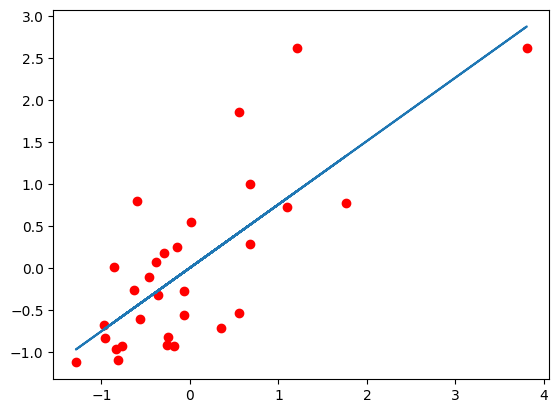

In [40]:
max_iter=1000
cost_old=0
alpha=0.01
m,c=mc_init(sales)
for i in range(max_iter):
    predictions=generate_predictions(m,c,flat)

    cost_new=find_cost(predictions,sales)

    if abs(cost_new-cost_old) < 10**-7:
        break

    gm,gc=generate_gradients(predictions,sales,flat)

    m,c=param_update(gm,gc,m,c)

    if i%20==0:
        print('i:',i,'m:',m,'c:',c,'Cost:',cost_new)

    cost_old=cost_new
result(m,c,sales,flat,predictions,cost_new,i)   